# Simulation 
## Assignment 2.2 – Identifying warm-up time
#### Ari Viitala 432568

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### A function for investigating the warm-up time in the server configuration. 

In [178]:
def warmUp(n_servers, n_customers):    
    #parameters for the poisson processes
    lambda_customer = 0.125
    lambda_server = 0.1   
    #first customer
    customer = np.random.exponential(lambda_customer)    
    #a list that contains times when a server is ready
    server_times = [10000000000] * n_servers
    #a vector that stores statuses of servers
    server_statuses = [0] * n_servers
    #index of the server that is ready next
    next_server_idx = 0
    #time when next server is ready
    next_server_t = 1000000
    #ques for all the servers
    ques = [0] * n_servers
    #vector for departure times from the system
    times = []
    #vector for arrival times to the system
    arrivals = []
    #simulation clock
    t = 0      
    while len(times) < n_customers:
        #if customer comes before any server is ready
        if customer < next_server_t:
            #save the arrival time
            arrivals.append(customer)
            if server_statuses[0] == 0:
                #if first server is free put the customer there and update the state of the server
                server_times[0] = customer + np.random.exponential(lambda_server)
                server_statuses[0] = 1
            else:
                #else put him in a queue
                ques[0] += 1
            #update simultion clock and generate next customer
            t = customer 
            customer = t + np.random.exponential(lambda_customer)
            #see which server is ready next and when              
        else:
            #if server is ready
            if next_server_idx == n_servers - 1:
                #if it is the last one, save the time to the departuretimes 
                times.append(next_server_t)   
            elif server_statuses[next_server_idx + 1] == 0:
                #else check if next server is free. If it is, put customer there and update the state of the server
                server_times[next_server_idx + 1] = next_server_t + np.random.exponential(lambda_server)
                server_statuses[next_server_idx + 1] = 1
            else:
                #else put the customer to the que of the next server 
                ques[next_server_idx + 1] += 1 
            if ques[next_server_idx] > 0:
                #if there is a person in the queue of the ready server take him in and remove from the que
                server_times[next_server_idx] = next_server_t + np.random.exponential(lambda_server)
                ques[next_server_idx] -= 1
            else:
                #else set the status of the server inactive and readytime to "infinite"
                server_times[next_server_idx] = 10000000
                server_statuses[next_server_idx] = 0            
            #update simulation clock
            t = next_server_t 
            #make sure that the next server is the earliest one ready
        next_server_t = min(server_times)
        next_server_idx = server_times.index(next_server_t)                
    #return the times how long people have been in the system
    return (np.array(times) - np.array(arrivals)[0:len(times)], times)

### A function for running a certain amount of warm-ups for a certain amount of customers with a certain amount of servers.

In [172]:
def simulation(simulations, customers, servers):
    #setting up a matrix to store the simulation results 
    times = [[]]*simulations 
    departures = [[]]*simulations
    #running the simulations 
    for i in range(0,simulations):        
        sim, dep = warmUp(servers, customers)
        times[i] = sim
        departures[i] = dep
    
    return np.array(times), np.array(departures)

### Computing simulations for 1 to 5 servers and storing them in a list 

In [176]:
#how many start-ups are simulated
iterations = 2000
#how many customers are simulated
customers = 500
sims = []
deps = []
for i in range(0, 5):
    sim, dep = simulation(iterations, customers, i + 1)
    sims.append(sim.T)
    deps.append(dep.T)
sims = np.array(sims)
deps = np.array(deps)

### Doing the Welch procedure for all the simulations of different amounts of servers 

In [179]:
series = [[]]*5
avg_deps = [[]]*5
for i in range(0, 5):
    #take the average for each time spent in the simulation 
    series[i] = np.mean(sims[i], 1)
    avg_deps[i] = np.mean(deps[i], 1)[0:customers]

### Plotting the different time series

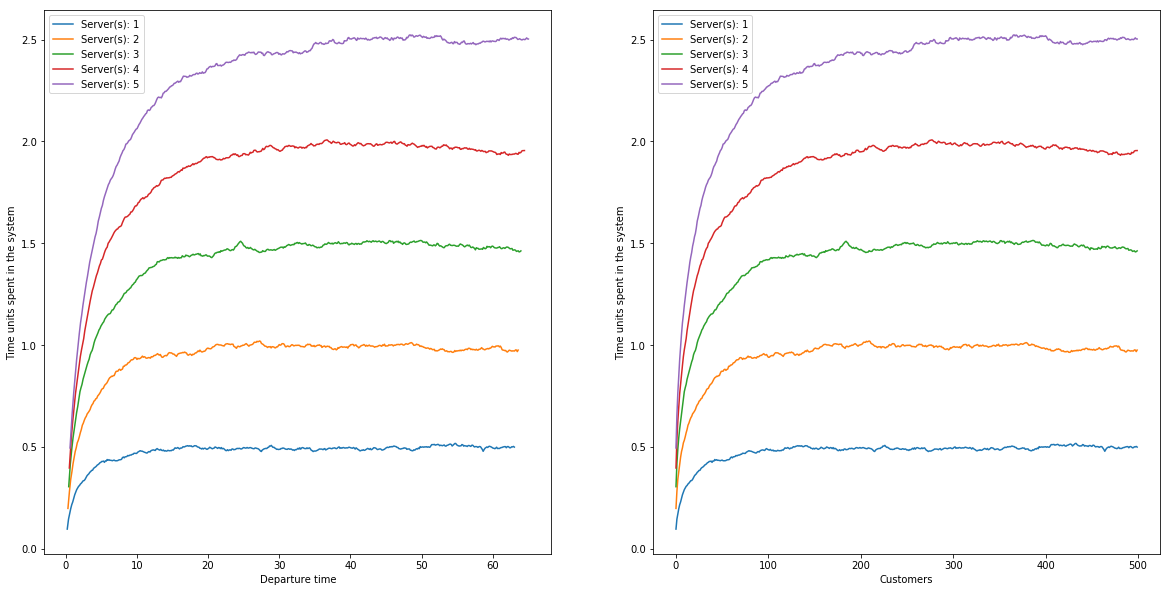

In [180]:
plt.figure(1, (20,10))
plt.subplot(1,2,1)
for i in range(0,5):
    plt.plot(avg_deps[i], series[i], label = "Server(s): " + str(i + 1))

plt.ylabel("Time units spent in the system")
plt.xlabel("Departure time")
plt.legend()
    
plt.subplot(1,2,2)
for i in range(0,5):
    plt.plot(series[i], label = "Server(s): " + str(i + 1))
    
plt.ylabel("Time units spent in the system")
plt.xlabel("Customers")
plt.legend()

As expected we see that the more there are servers the longer it will take to go through the system at the stady state. Also the more servers there are the longer it will take for the system to settle to a steady state. The effect is more pronounced on the curve for one server where we see that it takes significantly less time for it to reach the steady state and for others it takes progressively longer. For the first server it takes about 100 people to reach the steady state where it takes nearly 300 for the setup with 5 servers. Rest of the server amounts balance out somewhere in between. 

I plotted the graph for both the average departure time and the departures. Since I run so many simulations these are basically the same thing but scaled so the plots look the same.